In [1]:
from google.colab import drive
import os

# Google Drive 마운트
drive.mount('/content/drive')

# Google Drive 경로 설정
folder_path = '/content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data load

In [2]:
# import json

# # Google Drive 경로 설정
# final_merged_file_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/final_merged_data.json'

# # JSON 파일 읽기 및 처음 5개의 행 출력
# try:
#     with open(final_merged_file_path, 'r', encoding='utf-8') as f:
#         data = json.load(f)
#         print("Loaded data successfully!")

#         # 데이터 출력 (처음 5개 항목)
#         if isinstance(data, list):
#             for i, entry in enumerate(data[:5]):  # 처음 5개 데이터 출력
#                 print(f"Entry {i + 1}: {entry}")
#         else:
#             print("Data is not in list format. Displaying first 5 key-value pairs:")
#             for i, (key, value) in enumerate(data.items()):
#                 if i >= 5:
#                     break
#                 print(f"{key}: {value}")

# except FileNotFoundError:
#     print(f"File not found: {final_merged_file_path}")
# except json.JSONDecodeError as e:
#     print(f"Error decoding JSON: {e}")

KeyboardInterrupt: 

json to csv

In [8]:
# import json
# import csv

# # JSON 파일 경로 및 저장될 CSV 파일 경로 설정
# json_file_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/final_merged_data.json'
# csv_file_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/final_merged_data.csv'

# # JSON 데이터를 평탄화(flatten)하는 함수 정의
# def flatten_json(entry):
#     try:
#         flattened = {
#             'fileName': entry.get('fileName', ''),
#             'disease_category': entry.get('disease_category', ''),
#             'disease_name_kor': entry.get('disease_name', {}).get('kor', ''),
#             'disease_name_eng': entry.get('disease_name', {}).get('eng', ''),
#             'department': ', '.join(entry.get('department', [])),
#             'intention': entry.get('intention', ''),
#             'answer_intro': entry.get('answer', {}).get('intro', ''),
#             'answer_body': entry.get('answer', {}).get('body', ''),
#             'answer_conclusion': entry.get('answer', {}).get('conclusion', ''),
#             'num_of_words': entry.get('num_of_words', 0)
#         }
#         return flattened
#     except Exception as e:
#         print(f"Error processing entry: {entry} - {e}")
#         return None

# try:
#     # JSON 파일 읽기
#     with open(json_file_path, 'r', encoding='utf-8') as json_file:
#         data = json.load(json_file)

#     # 데이터 평탄화
#     flattened_data = [flatten_json(entry) for entry in data if flatten_json(entry) is not None]

#     # CSV 파일로 저장
#     with open(csv_file_path, 'w', encoding='utf-8', newline='') as csv_file:
#         fieldnames = [
#             'fileName', 'disease_category', 'disease_name_kor',
#             'disease_name_eng', 'department', 'intention',
#             'answer_intro', 'answer_body', 'answer_conclusion', 'num_of_words'
#         ]
#         writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#         writer.writeheader()
#         writer.writerows(flattened_data)

#     print(f"CSV file successfully saved to: {csv_file_path}")

# except FileNotFoundError:
#     print(f"File not found: {json_file_path}")
# except json.JSONDecodeError as e:
#     print(f"Error decoding JSON: {e}")
# except Exception as e:
#     print(f"An error occurred: {e}")

CSV file successfully saved to: /content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/final_merged_data.csv


csv data lode

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
csv_file_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/final_merged_data.csv'

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)


<ipython-input-2-a22e4f34b7d2>:9: DtypeWarning: Columns (4,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


##EDA

필요없는 컬럼 제거

In [3]:
import pandas as pd
df.isna().sum()

,0
fileName,0
disease_category,0
disease_name_kor,0
disease_name_eng,28222
department,1143131
intention,0
answer_intro,1143131
answer_body,1143131
answer_conclusion,1143131
num_of_words,0


In [4]:
df.dropna(inplace=True) # 단순 제거해도 문제없음

In [5]:
columns_to_drop = ['fileName', 'num_of_words', 'disease_name_eng']
df = df.drop(columns=columns_to_drop)

In [6]:
display(df.head())

,disease_category,disease_name_kor,department,intention,answer_intro,answer_body,answer_conclusion
0,기타,대사 증후군,가정의학과,검진,대사 증후군의 검진은 대사 기능을 평가하는 것으로 시작됩니다. 복부 비만을 판단하기...,대사 증후군의 진단은 여러 가지 방법을 통해 이루어집니다. 첫 번째는 복부 비만을 ...,"대사 증후군의 검진은 여러 가지 방법을 통해 이루어지며, 혈압, 혈중 중성지방, 혈..."
1,기타,대사 증후군,가정의학과,검진,"대사 증후군은 혈압 상승, 고혈당, 고혈압, 이상 지질혈증, 심혈관계 질환, 당뇨병...","이러한 질환들은 모두 비만, 고혈압, 고혈당, 고지혈증, 심혈관계 질환, 당뇨병 등...","대사 증후군은 조기 발견과 관리가 중요하며, 적절한 약물 치료와 생활 습관 개선을 ..."
2,기타,대사 증후군,가정의학과,검진,대사 증후군은 건강검진에 매우 유용한 건강 지표입니다.,"대사 증후군의 검진에는 여러 가지 방법이 포함됩니다. 첫 번째로, 혈압 측정이 있습...","대사 증후군은 건강검진에 있어 매우 유용한 건강 지표입니다. 혈압 측정, 체중 측정..."
3,기타,대사 증후군,가정의학과,검진,대사 증후군을 검진하기 위한 절차에는 몇 가지 주의사항이 있습니다.,"첫째, 복부 비만은 대사 증후군을 확인하는 주요 지표입니다. 따라서 의사는 환자의 ...",이러한 방법을 통해 의사는 환자에게 올바른 검진 결과를 제공하여 대사 증후군의 위험...
4,기타,대사 증후군,가정의학과,검진,대사 증후군은 복부 비만과 인슐린 저항성을 주요한 원인으로 하는 질환입니다. 이러한...,"대사 증후군을 진단하기 위해 다양한 방법이 사용됩니다. 예를 들어, 체중과 키의 비...","대사 증후군의 건강 검진은 이러한 다양한 방법을 통해 수행되며, 위험한 요소에 대한..."


In [7]:
df.isna().sum()

,0
disease_category,0
disease_name_kor,0
department,0
intention,0
answer_intro,0
answer_body,0
answer_conclusion,0


In [12]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

<ipython-input-8-10e43269ae34>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


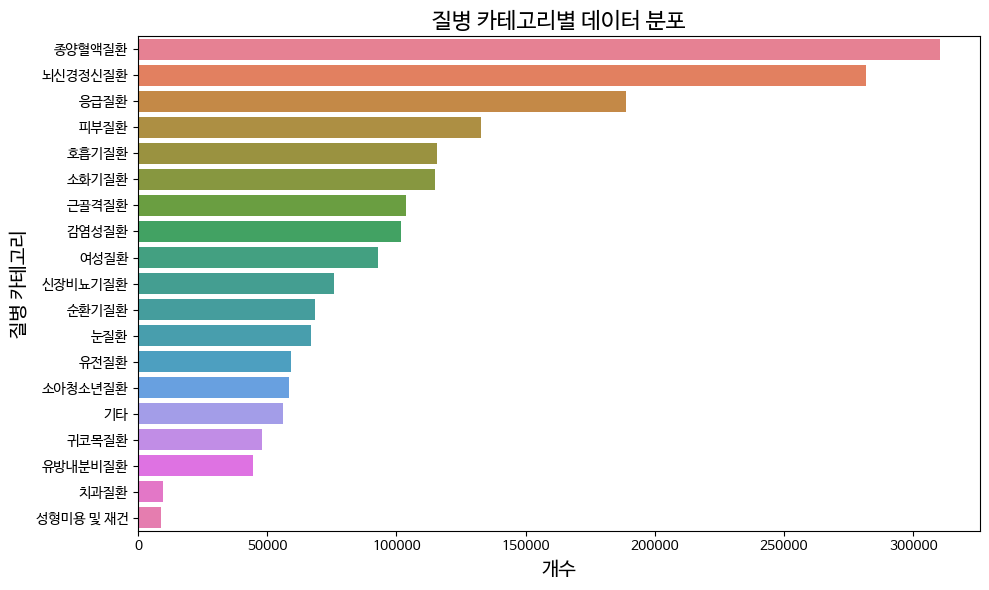

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 카테고리별 고유 색상 설정
unique_categories = df['disease_category'].value_counts().index
palette = sns.color_palette("husl", len(unique_categories))  # 색상 팔레트 선택

# 질병 카테고리 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='disease_category',
    order=unique_categories,
    palette=palette  # 색상 지정
)

# 그래프 제목과 축 레이블 설정
plt.title('질병 카테고리별 데이터 분포', fontsize=16)
plt.xlabel('개수', fontsize=14)
plt.ylabel('질병 카테고리', fontsize=14)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

<ipython-input-9-9ee35028c5a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


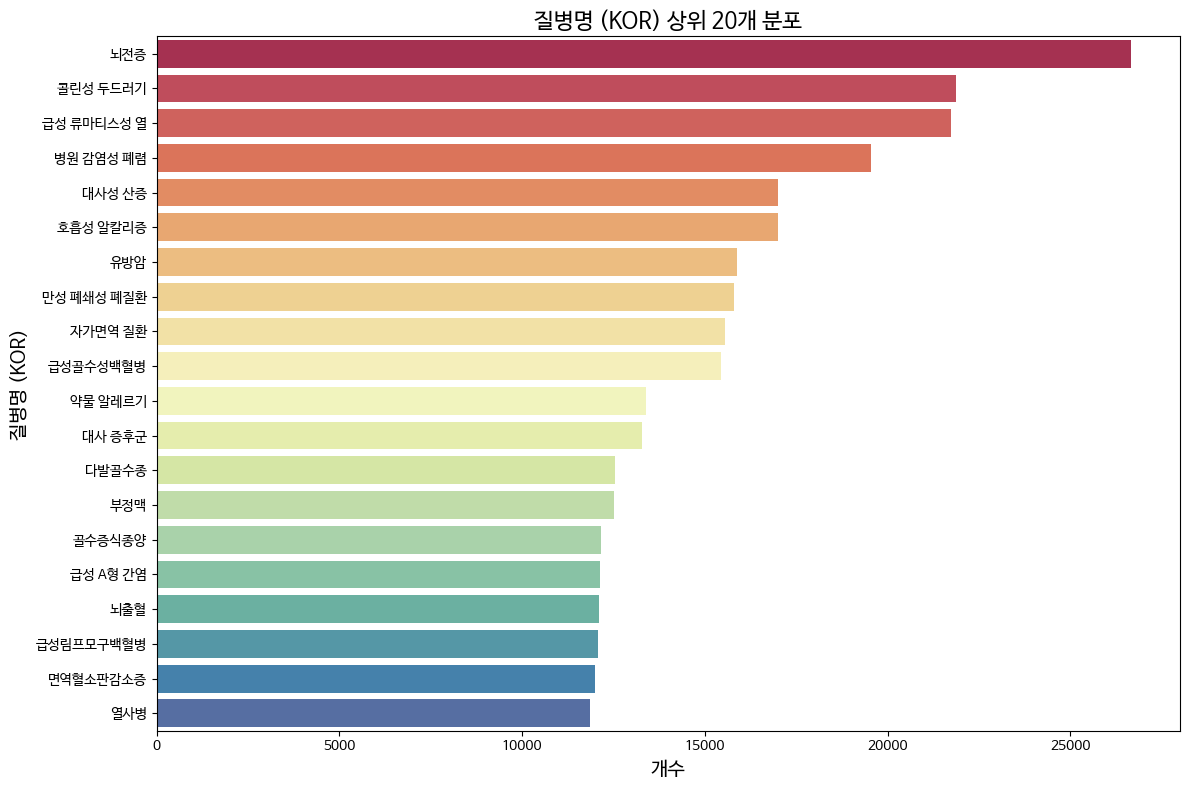

In [9]:

# disease_name_kor 분포 시각화
top_n = 20  # 상위 N개의 값만 표시
top_disease_names = df['disease_name_kor'].value_counts().head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_disease_names.values,
    y=top_disease_names.index,
    palette="Spectral"
)

# 그래프 제목과 축 레이블 설정
plt.title('질병명 (KOR) 상위 20개 분포', fontsize=16)
plt.xlabel('개수', fontsize=14)
plt.ylabel('질병명 (KOR)', fontsize=14)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

<ipython-input-11-eeeebcc646f7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


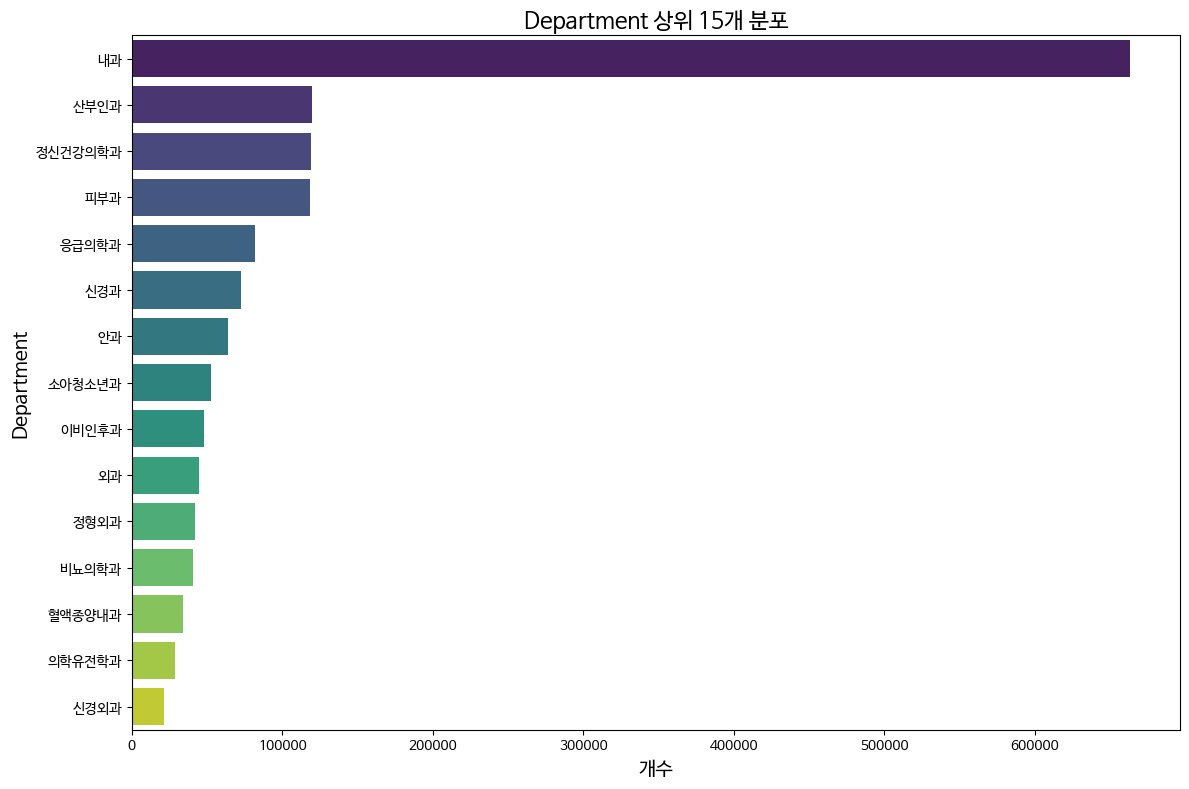

In [11]:
# department 컬럼 분포 계산
top_n = 15  # 상위 N개의 값만 표시
df['department'] = df['department'].fillna('Unknown')  # 결측값 처리
top_departments = df['department'].value_counts().head(top_n)

# department 분포 시각화
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_departments.values,
    y=top_departments.index,
    palette="viridis"
)

# 그래프 제목과 축 레이블 설정
plt.title('Department 상위 15개 분포', fontsize=16)
plt.xlabel('개수', fontsize=14)
plt.ylabel('Department', fontsize=14)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

<ipython-input-12-92139f070026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


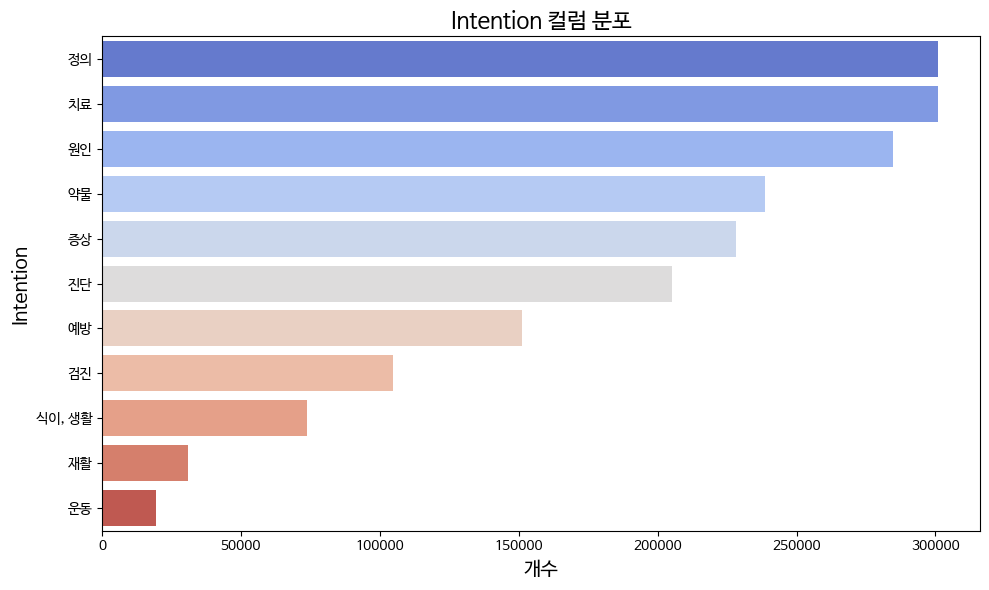

In [12]:
# `intention` 컬럼 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='intention',
    order=df['intention'].value_counts().index,
    palette="coolwarm"  # 색상 팔레트 설정
)

# 그래프 제목과 축 레이블 설정
plt.title('Intention 컬럼 분포', fontsize=16)
plt.xlabel('개수', fontsize=14)
plt.ylabel('Intention', fontsize=14)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

<ipython-input-13-c45dfcdee577>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], data=df, y='disease_category', order=df['disease_category'].value_counts().index, palette='viridis')
<ipython-input-13-c45dfcdee577>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], y=top_disease_names.index, x=top_disease_names.values, palette='plasma')
<ipython-input-13-c45dfcdee577>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], y=top_departments.index, x=top_departments.values, palette='coolwarm')
<ipython-i

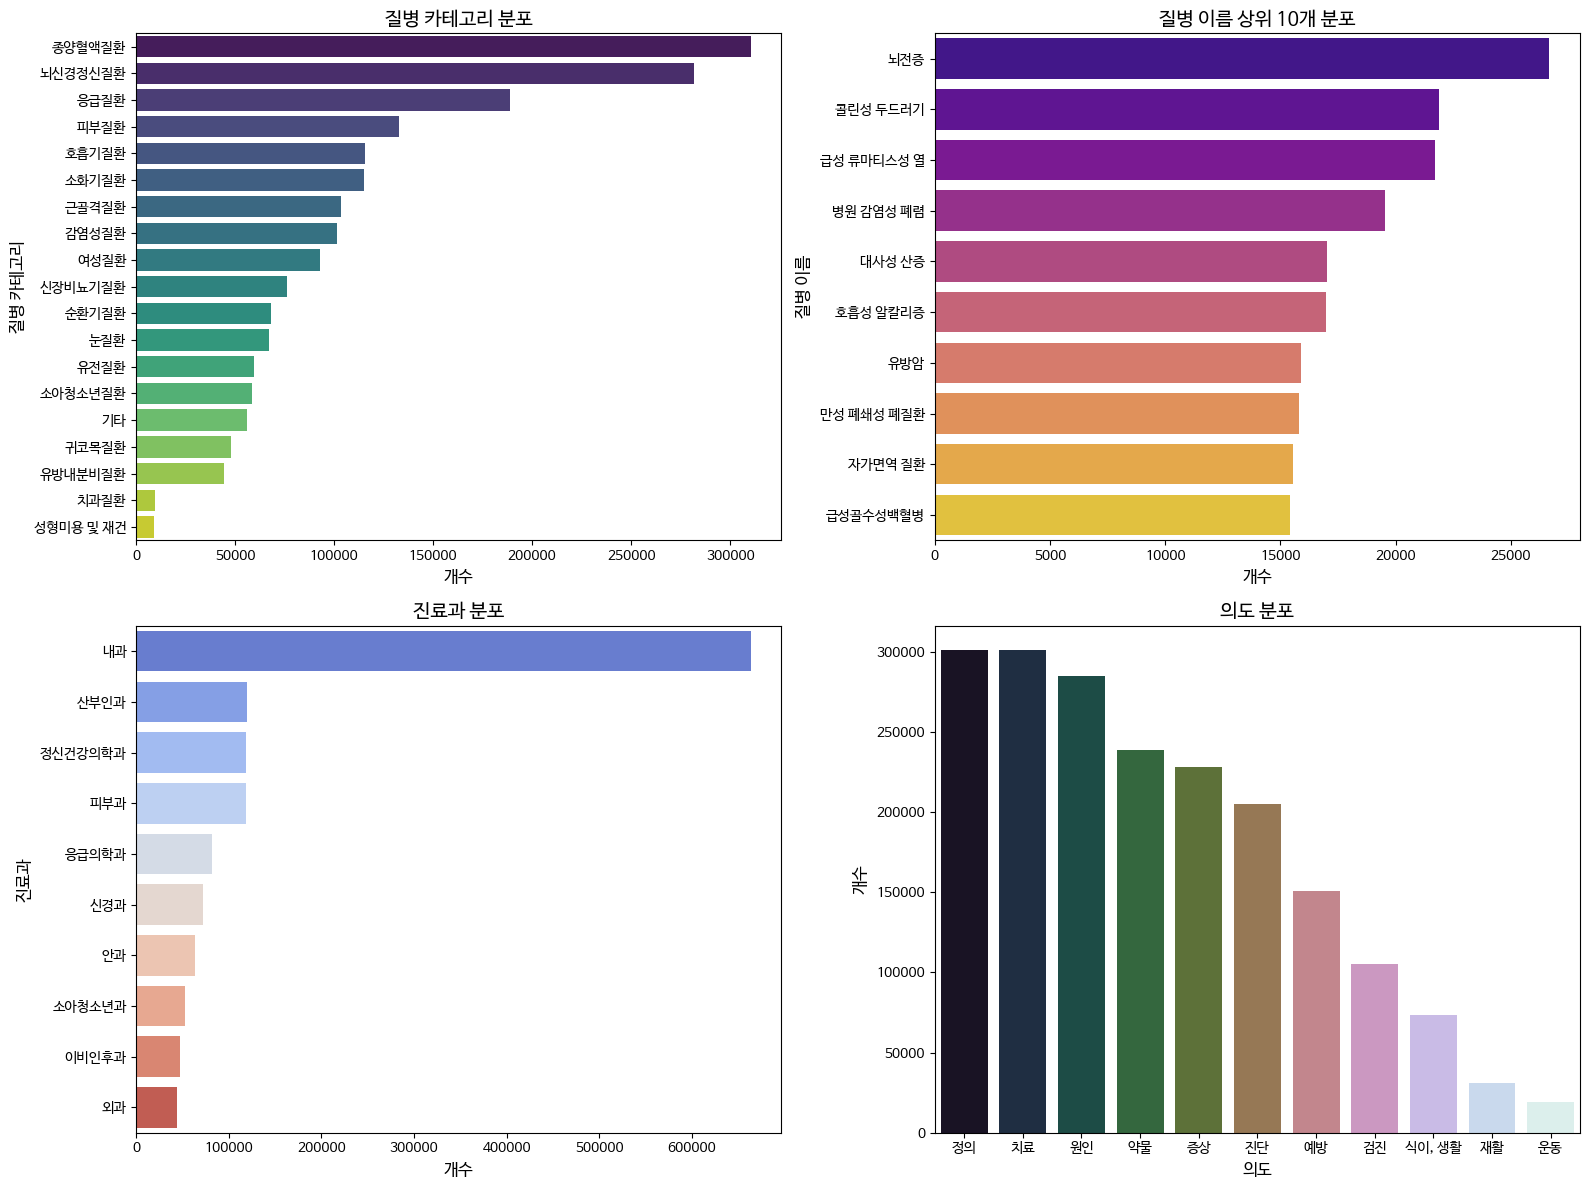

In [13]:

# 한글 폰트 설정 (NanumBarunGothic 사용)
plt.rc('font', family='NanumBarunGothic')

# 그래프 크기 및 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 첫 번째 그래프: disease_category 분포
sns.countplot(ax=axes[0, 0], data=df, y='disease_category', order=df['disease_category'].value_counts().index, palette='viridis')
axes[0, 0].set_title('질병 카테고리 분포', fontsize=14)
axes[0, 0].set_xlabel('개수', fontsize=12)
axes[0, 0].set_ylabel('질병 카테고리', fontsize=12)

# 두 번째 그래프: disease_name_kor 분포 (상위 10개)
top_disease_names = df['disease_name_kor'].value_counts().head(10)
sns.barplot(ax=axes[0, 1], y=top_disease_names.index, x=top_disease_names.values, palette='plasma')
axes[0, 1].set_title('질병 이름 상위 10개 분포', fontsize=14)
axes[0, 1].set_xlabel('개수', fontsize=12)
axes[0, 1].set_ylabel('질병 이름', fontsize=12)

# 세 번째 그래프: department 분포
top_departments = df['department'].value_counts().head(10)
sns.barplot(ax=axes[1, 0], y=top_departments.index, x=top_departments.values, palette='coolwarm')
axes[1, 0].set_title('진료과 분포', fontsize=14)
axes[1, 0].set_xlabel('개수', fontsize=12)
axes[1, 0].set_ylabel('진료과', fontsize=12)

# 네 번째 그래프: intention 분포
sns.countplot(ax=axes[1, 1], data=df, x='intention', order=df['intention'].value_counts().index, palette='cubehelix')
axes[1, 1].set_title('의도 분포', fontsize=14)
axes[1, 1].set_xlabel('의도', fontsize=12)
axes[1, 1].set_ylabel('개수', fontsize=12)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

##Preprocessing

In [17]:
# 다중 기준 계층적 샘플링 함수
def multi_column_stratified_sample(dataframe, columns, frac=0.25, random_state=42):
    """
    여러 컬럼을 기준으로 계층적 샘플링 수행.

    Args:
        dataframe (pd.DataFrame): 원본 데이터프레임.
        columns (list): 기준 컬럼 목록.
        frac (float): 샘플링 비율 (0~1).
        random_state (int): 랜덤 시드.

    Returns:
        pd.DataFrame: 샘플링된 데이터프레임.
    """
    # 기준 컬럼을 결합하여 그룹화 키 생성
    dataframe['combined'] = dataframe[columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

    # 각 그룹별로 샘플링 수행
    sampled_df = dataframe.groupby('combined', group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=random_state)
    )

    # 임시로 생성한 'combined' 컬럼 제거
    return sampled_df.drop(columns=['combined'])

# 다중 기준 계층적 샘플링 수행
columns_to_sample = ['disease_category', 'intention']  # 기준 컬럼 설정
sampled_df = multi_column_stratified_sample(df, columns=columns_to_sample, frac=0.25)

# 샘플링된 데이터 저장
sampled_csv_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.csv'
sampled_df.to_csv(sampled_csv_path, index=False, encoding='utf-8-sig')

print(f"샘플링된 데이터가 저장되었습니다: {sampled_csv_path}")
print(f"샘플링된 데이터 개수: {len(sampled_df)}")

<ipython-input-17-24368b823ac4>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = dataframe.groupby('combined', group_keys=False).apply(


샘플링된 데이터가 저장되었습니다: /content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.csv
샘플링된 데이터 개수: 484676


In [18]:
# 샘플링된 데이터 내용 확인 (처음 5개 행 출력)
print("샘플링된 데이터 내용:")
print(sampled_df.head())

샘플링된 데이터 내용:
        disease_category disease_name_kor department intention  \
1039108            감염성질환             심내막염       심장내과        검진   
1076346            감염성질환     헤르페스 바이러스 감염        피부과        검진   
1003658            감염성질환              패혈증        피부과        검진   
1074691            감염성질환               결핵         내과        검진   
1074678            감염성질환               결핵         내과        검진   

                                              answer_intro  \
1039108  심내막염은 심내막과 심장을 감염시키는 질병으로, 정확한 진단을 위해서는 여러 가지 ...   
1076346  헤르페스 바이러스 감염은 특별한 검사와 진단 없이 일반적으로 몇 가지 검사만으로 진...   
1003658  패혈증은 심각한 감염으로 인해 발생하는 심각한 상태로, 조기 진단과 적절한 치료가 ...   
1074691  결핵은 결핵균에 의해 발생하는 감염성 질환으로, 전파 경로는 기침, 재채기, 대화 ...   
1074678  결핵은 매우 전염성이 높은 질병으로, 결핵을 예방하고 전파를 방지하기 위해 정기적인...   

                                               answer_body  \
1039108  심내막 염증과 심낭염을 감별 진단하기 위해 일반적으로 흉부 X선 검사가 진행됩니다....   
1076346  일반적으로, 헤르페스 바이러스 감염의 주요 증상인 통증, 물집 모양의 상처, 발진 ...   
1003658  패혈증은 다양한 감염 질환에 의해 발생할

<ipython-input-19-0a07ddfdc6ec>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], data=sampled_df, y='disease_category', order=sampled_df['disease_category'].value_counts().index, palette='viridis')
<ipython-input-19-0a07ddfdc6ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], y=top_disease_names.index, x=top_disease_names.values, palette='plasma')
<ipython-input-19-0a07ddfdc6ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], y=top_departments.index, x=top_departments.values, palette='coolw

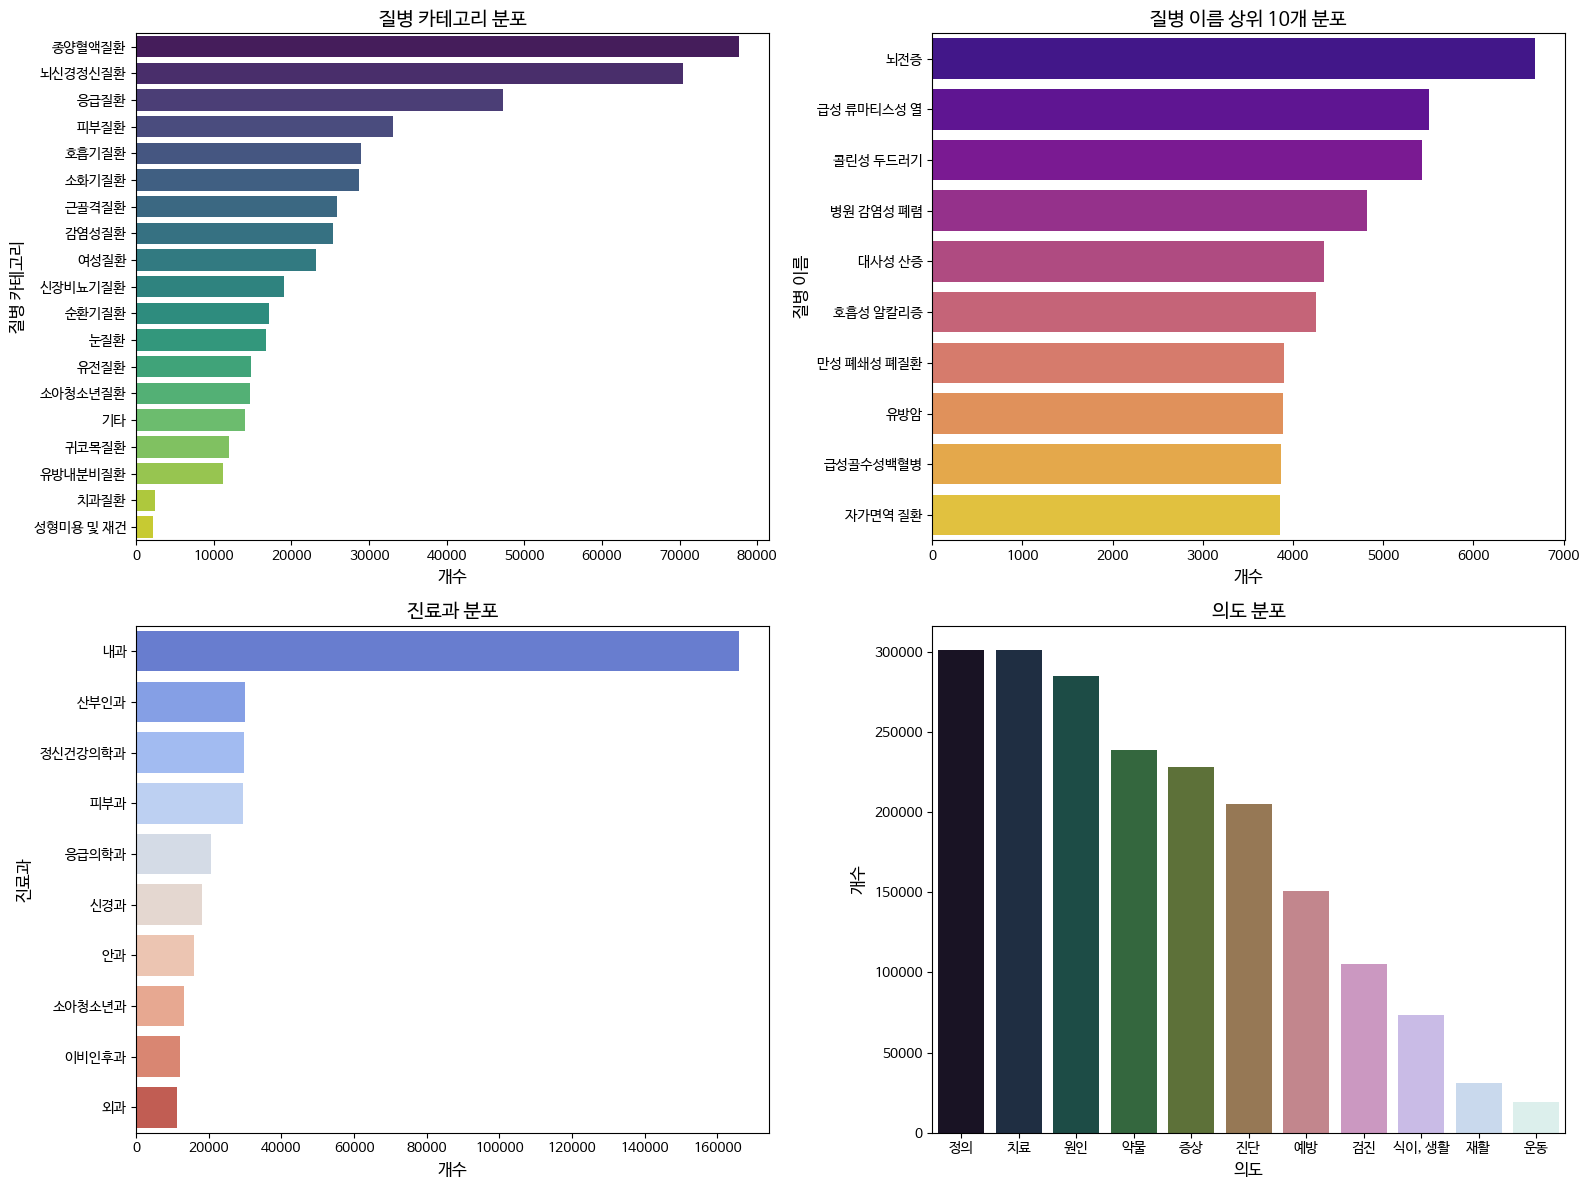

In [19]:

# 한글 폰트 설정 (NanumBarunGothic 사용)
plt.rc('font', family='NanumBarunGothic')

# 그래프 크기 및 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 첫 번째 그래프: disease_category 분포
sns.countplot(ax=axes[0, 0], data=sampled_df, y='disease_category', order=sampled_df['disease_category'].value_counts().index, palette='viridis')
axes[0, 0].set_title('질병 카테고리 분포', fontsize=14)
axes[0, 0].set_xlabel('개수', fontsize=12)
axes[0, 0].set_ylabel('질병 카테고리', fontsize=12)

# 두 번째 그래프: disease_name_kor 분포 (상위 10개)
top_disease_names = sampled_df['disease_name_kor'].value_counts().head(10)
sns.barplot(ax=axes[0, 1], y=top_disease_names.index, x=top_disease_names.values, palette='plasma')
axes[0, 1].set_title('질병 이름 상위 10개 분포', fontsize=14)
axes[0, 1].set_xlabel('개수', fontsize=12)
axes[0, 1].set_ylabel('질병 이름', fontsize=12)

# 세 번째 그래프: department 분포
top_departments = sampled_df['department'].value_counts().head(10)
sns.barplot(ax=axes[1, 0], y=top_departments.index, x=top_departments.values, palette='coolwarm')
axes[1, 0].set_title('진료과 분포', fontsize=14)
axes[1, 0].set_xlabel('개수', fontsize=12)
axes[1, 0].set_ylabel('진료과', fontsize=12)

# 네 번째 그래프: intention 분포
sns.countplot(ax=axes[1, 1], data=df, x='intention', order=sampled_df['intention'].value_counts().index, palette='cubehelix')
axes[1, 1].set_title('의도 분포', fontsize=14)
axes[1, 1].set_xlabel('의도', fontsize=12)
axes[1, 1].set_ylabel('개수', fontsize=12)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

In [20]:
# 질문 템플릿 설정
templates = {
    "정의": [
        "{disease_name}이란 무엇인가요?",
        "{disease_name}은 어떤 질병인가요?",
        "{disease_category}에서 {disease_name}의 정의를 알고 싶습니다.",
        "{department}에서 말하는 {disease_name}의 정확한 정의는 무엇인가요?"
    ],
    "치료": [
        "{disease_name}의 치료법에는 무엇이 있나요?",
        "{department}에서 {disease_name}을 치료하려면 어떤 절차가 필요한가요?",
        "{disease_name} 치료에 사용되는 약물이나 방법은 무엇인가요?",
        "가장 효과적인 {disease_name} 치료법은 무엇인가요?"
    ],
    "원인": [
        "{disease_name}이 발생하는 주요 원인은 무엇인가요?",
        "{disease_category}에서 {disease_name}의 원인을 설명해 주세요.",
        "{disease_name}은 어떤 환경이나 조건에서 발생하나요?",
        "{department}에서 {disease_name}의 원인 분석 결과는 무엇인가요?"
    ],
    "약물": [
        "{disease_name} 치료에 사용하는 대표적인 약물은 무엇인가요?",
        "{disease_name}을 치료하기 위해 어떤 약물이 가장 효과적인가요?",
        "{department}에서 추천하는 {disease_name} 약물 치료법은 무엇인가요?",
        "{disease_name} 치료 시 약물 부작용은 무엇인가요?"
    ],
    "증상": [
        "{disease_name}에 걸렸을 때 나타나는 주요 증상은 무엇인가요?",
        "{disease_name} 증상 중에서 주의해야 할 점은 무엇인가요?",
        "{disease_category} 질환 중 {disease_name}의 증상은 어떻게 다른가요?",
        "초기 {disease_name} 증상은 어떻게 나타나나요?"
    ],
    "진단": [
        "{disease_name}을 진단하려면 어떤 검사가 필요하나요?",
        "{department}에서 {disease_name}을 진단하는 방법은 무엇인가요?",
        "{disease_name}을 정확히 진단하기 위한 절차를 알려주세요.",
        "정확한 {disease_name} 진단을 위해 어떤 자료가 필요한가요?"
    ],
    "예방": [
        "{disease_name}을 예방하기 위한 방법에는 무엇이 있나요?",
        "{disease_category}에서 {disease_name} 예방에 대해 알고 싶습니다.",
        "{disease_name} 예방을 위한 식습관이나 생활 습관은 무엇인가요?",
        "{department}에서 권장하는 {disease_name} 예방 조치는 무엇인가요?"
    ],
    "검진": [
        "{disease_name} 검진을 받으려면 어떻게 해야 하나요?",
        "{disease_name} 검진 시 중요한 검사 항목은 무엇인가요?",
        "{department}에서 {disease_name} 검진 절차를 알려주세요.",
        "{disease_name} 검진을 정기적으로 받아야 하는 이유는 무엇인가요?"
    ],
    "식이, 생활": [
        "{disease_name}을 예방하거나 치료하기 위해 추천하는 식단은 무엇인가요?",
        "{disease_category}와 관련된 {disease_name} 환자를 위한 생활 관리법은 무엇인가요?",
        "{disease_name} 관리를 위해 피해야 할 음식은 무엇인가요?",
        "{department}에서 제안하는 {disease_name} 관련 생활습관은 무엇인가요?"
    ],
    "재활": [
        "{disease_name}에서 재활 치료가 중요한 이유는 무엇인가요?",
        "{department}에서 {disease_name} 재활 프로그램은 어떻게 구성되나요?",
        "{disease_name} 환자를 위한 재활 치료법에는 무엇이 있나요?",
        "{disease_category} 질환인 {disease_name} 재활 치료의 목표는 무엇인가요?"
    ],
    "운동": [
        "{disease_name} 환자에게 적합한 운동은 무엇인가요?",
        "{department}에서 추천하는 {disease_name} 환자를 위한 운동 요법은 무엇인가요?",
        "{disease_category} 질환 중 {disease_name} 관리에 도움이 되는 운동법을 알고 싶습니다.",
        "{disease_name} 치료 중 운동을 어떻게 병행해야 하나요?"
    ]
}


In [22]:
from collections import Counter
import numpy as np
import random  # random 모듈 임포트



# 데이터프레임에서 의도별 데이터 분포 계산
intention_counts = Counter(df['intention'])
total_counts = sum(intention_counts.values())

# 의도별 가중치 계산 (비율 기반)
weights = {intent: total_counts / count for intent, count in intention_counts.items()}

def create_chatbot_dataset_with_balanced_sampling(df):
    """
    데이터프레임에서 균형 잡힌 질문과 답변 데이터를 생성.

    Args:
        df (pd.DataFrame): 입력 데이터프레임.

    Returns:
        list: QA 데이터 리스트 (JSONL 형식).
    """
    result = []

    for _, row in df.iterrows():
        disease_name = row['disease_name_kor']
        disease_category = row['disease_category']
        department = row['department'] if pd.notna(row['department']) else "관련 진료과"
        intention = row['intention']

        # 해당 의도의 템플릿을 가져옴
        if intention not in templates:
            intention = "Unknown"
        available_templates = templates[intention]

        # 의도별 가중치 기반 샘플링
        weight = weights.get(intention, 1)
        question_template = random.choices(
            available_templates,  # 선택 가능한 템플릿 리스트
            k=1,  # 한 개 선택
            weights=[weight] * len(available_templates)  # 가중치 적용
        )[0]

        question = question_template.format(
            disease_name=disease_name,
            disease_category=disease_category,
            department=department
        )

        # 답변 생성
        answer = f"{row['answer_intro']} {row['answer_body']} {row['answer_conclusion']}"

        # JSONL 형식 데이터 추가
        result.append({"prompt": question, "response": answer})

    return result

# QA 데이터 생성
chatbot_data = create_chatbot_dataset_with_balanced_sampling(df)

In [25]:
import json

# JSONL 파일로 저장
output_path = '/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl'
with open(output_path, 'w', encoding='utf-8') as f:
    for entry in chatbot_data:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

print(f"QA 데이터가 JSONL 형식으로 저장되었습니다: {output_path}")

QA 데이터가 JSONL 형식으로 저장되었습니다: /content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl


In [90]:
import json

file_path = '/content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl'

# 데이터 개수를 계산
total_count = sum(1 for _ in open(file_path, 'r', encoding='utf-8'))

# 데이터 출력 (최대 10개)
print(f"총 데이터 개수: {total_count}\n")
print("데이터 샘플 (최대 10개):\n")
with open(file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i >= 10:
            break
        data = json.loads(line)
        print(data)

총 데이터 개수: 1938711

데이터 샘플 (최대 10개):

{'prompt': '대사 증후군 검진을 정기적으로 받아야 하는 이유는 무엇인가요?', 'response': '대사 증후군의 검진은 대사 기능을 평가하는 것으로 시작됩니다. 복부 비만을 판단하기 위해 허리 둘레 측정과 혈압, 혈중 중성지방, 혈당, 고밀도 지단백질 수치 측정이 사용됩니다. 대사 증후군의 진단은 여러 가지 방법을 통해 이루어집니다. 첫 번째는 복부 비만을 확인하는 허리 둘레 측정이 있습니다. 복부 비만이 있는 경우, 고혈압, 고혈당, 혈청 중성지방 수치, 고밀도 지단백질 수치 등의 측정이 이루어질 수 있습니다. 대사 증후군의 검진은 여러 가지 방법을 통해 이루어지며, 혈압, 혈중 중성지방, 혈당, 고밀도 지단백질 수치를 측정하여 질병의 위험을 평가합니다.'}
{'prompt': '대사 증후군 검진을 받으려면 어떻게 해야 하나요?', 'response': '대사 증후군은 혈압 상승, 고혈당, 고혈압, 이상 지질혈증, 심혈관계 질환, 당뇨병 등의 다양한 질병이 동시에 발생하는 상태를 말합니다. 이러한 질환들은 모두 비만, 고혈압, 고혈당, 고지혈증, 심혈관계 질환, 당뇨병 등의 증상을 나타냅니다. 이 질환들은 주로 복부 비만, 혈압 상승, 높은 혈당은 고혈압을 유발하고, 고혈압은 심혈관계 질환 및 당뇨병으로 이어집니다. 또한, 이 상태는 신장 기능 저하와 심혈관 질환, 지방간과 같은 이상 혈관 질환을 유발할 수 있습니다. 대사 증후군은 조기 발견과 관리가 중요하며, 적절한 약물 치료와 생활 습관 개선을 통해 예방 및 치료 가능한 질병입니다.'}
{'prompt': '대사 증후군 검진을 받으려면 어떻게 해야 하나요?', 'response': '대사 증후군은 건강검진에 매우 유용한 건강 지표입니다. 대사 증후군의 검진에는 여러 가지 방법이 포함됩니다. 첫 번째로, 혈압 측정이 있습니다. 혈압은 심혈관 질환의 주요 위험 요인 중 하나로 알려져 있습니다. 일반적으로 혈압이 높을수록 대사 증후

In [91]:
import json

# JSONL 파일 경로
jsonl_path = "/content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl"

def check_missing_values(jsonl_path):
    missing_entries = []  # 누락된 데이터가 있는 항목 저장
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for idx, line in enumerate(f):
            entry = json.loads(line)
            # 누락된 값 확인 (특정 키가 없거나 빈 문자열인 경우)
            if not entry.get("prompt") or not entry.get("response"):
                missing_entries.append((idx, entry))

    # 결과 출력
    if missing_entries:
        print(f"총 {len(missing_entries)}개의 누락된 데이터가 발견되었습니다.")
        for idx, entry in missing_entries[:10]:  # 최대 10개의 누락된 데이터만 출력
            print(f"행 {idx}: {entry}")
    else:
        print("누락된 데이터가 없습니다.")

# 실행
check_missing_values(jsonl_path)

누락된 데이터가 없습니다.


학습 테스트를 위해 데이터 샘플링 (1000개)

In [31]:
# import json

# # 원본 데이터 경로
# original_file_path = '/content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl'

# # 샘플링된 데이터 저장 경로
# sample_file_path = '/content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2/sampled_data_1000.jsonl'

# # 샘플 데이터 추출
# sample_size = 1000
# sampled_data = []

# # JSONL 파일에서 1000개 데이터 추출
# with open(original_file_path, 'r', encoding='utf-8') as file:
#     for i, line in enumerate(file):
#         if i >= sample_size:
#             break
#         data = json.loads(line)
#         sampled_data.append(data)

# # 추출된 데이터를 새로운 JSONL 파일로 저장
# with open(sample_file_path, 'w', encoding='utf-8') as file:
#     for entry in sampled_data:
#         file.write(json.dumps(entry, ensure_ascii=False) + "\n")

# print(f"샘플 데이터 {sample_size}개가 추출되어 저장되었습니다: {sample_file_path}")

샘플 데이터 1000개가 추출되어 저장되었습니다: /content/drive/My Drive/멋쟁이사자처럼/실전프로젝트2/sampled_data_1000.jsonl


## Dataset & Dataloader

In [32]:
pip install transformers

In [92]:
import json
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments
from torch.utils.data import Dataset

# 1. 데이터셋 클래스 정의
class QADataset(Dataset):
    """
    GPT 모델 학습을 위한 데이터셋 클래스.

    Args:
        data (list): JSON 데이터 리스트 (질문/답변 쌍).
        tokenizer (GPT2Tokenizer): KoGPT2에 맞는 토크나이저.
        max_length (int): 입력 시퀀스 최대 길이 (디폴트: 256).
    """
    def __init__(self, data, tokenizer, max_length=256):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        # 질문과 답변을 결합하여 모델 입력 생성
        input_text = f"질문: {item['prompt']} 답변: {item['response']}"
        encoding = self.tokenizer(
            input_text,
            max_length=self.max_length,  # 입력 길이를 제한
            padding="max_length",       # 부족한 길이를 패딩으로 채움
            truncation=True,            # 초과된 부분은 잘라냄
            return_tensors="pt"         # PyTorch 텐서로 반환
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),  # 입력 토큰 ID
            "attention_mask": encoding["attention_mask"].squeeze(),  # 마스크
            "labels": encoding["input_ids"].squeeze(),  # GPT 모델에서는 labels=input_ids
        }


In [93]:
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
import torch
import json

# JSON 데이터 로드
jsonl_path = "/content/drive/MyDrive/멋쟁이사자처럼/실전프로젝트2/sampled_data_25.jsonl"
with open(jsonl_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f if line.strip()]
filtered_data = [item for item in data if item.get("prompt") and item.get("response")]

# 토크나이저 로드 및 패딩 토큰 추가
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # 패딩 토큰 추가

# eos_token 설정
if tokenizer.eos_token is None:
    tokenizer.eos_token = '</s>'

# eos_token을 pad_token으로 지정하여 어휘 크기 증가 방지
tokenizer.pad_token = tokenizer.eos_token

# 모델 로드
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")

# 모델의 pad_token_id 설정
model.config.pad_token_id = tokenizer.pad_token_id

# 데이터셋 생성
train_dataset = QADataset(filtered_data[:int(len(filtered_data) * 0.8)], tokenizer)  # 학습 데이터 (80%)
val_dataset = QADataset(filtered_data[int(len(filtered_data) * 0.8):], tokenizer)   # 검증 데이터 (20%)



# 모델의 PAD 토큰 ID를 토크나이저와 일치시킴
model.config.pad_token_id = tokenizer.pad_token_id


# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 토크나이저와 모델 정보 출력
print(f"Tokenizer EOS Token: {tokenizer.eos_token}")
print(f"Tokenizer PAD Token: {tokenizer.pad_token}")
print(f"Tokenizer PAD Token ID: {tokenizer.pad_token_id}")
print(f"Model PAD Token ID: {model.config.pad_token_id}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


Tokenizer EOS Token: </s>
Tokenizer PAD Token: </s>
Tokenizer PAD Token ID: 1
Model PAD Token ID: 1


##모델 학습

PEFT

In [78]:
# from transformers import GPT2LMHeadModel

# # 모델 로드
# model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")

# # 모든 모듈 이름과 구조 출력
# for name, module in model.named_modules():
#     print(name)


transformer
transformer.wte
transformer.wpe
transformer.drop
transformer.h
transformer.h.0
transformer.h.0.ln_1
transformer.h.0.attn
transformer.h.0.attn.c_attn
transformer.h.0.attn.c_proj
transformer.h.0.attn.attn_dropout
transformer.h.0.attn.resid_dropout
transformer.h.0.ln_2
transformer.h.0.mlp
transformer.h.0.mlp.c_fc
transformer.h.0.mlp.c_proj
transformer.h.0.mlp.act
transformer.h.0.mlp.dropout
transformer.h.1
transformer.h.1.ln_1
transformer.h.1.attn
transformer.h.1.attn.c_attn
transformer.h.1.attn.c_proj
transformer.h.1.attn.attn_dropout
transformer.h.1.attn.resid_dropout
transformer.h.1.ln_2
transformer.h.1.mlp
transformer.h.1.mlp.c_fc
transformer.h.1.mlp.c_proj
transformer.h.1.mlp.act
transformer.h.1.mlp.dropout
transformer.h.2
transformer.h.2.ln_1
transformer.h.2.attn
transformer.h.2.attn.c_attn
transformer.h.2.attn.c_proj
transformer.h.2.attn.attn_dropout
transformer.h.2.attn.resid_dropout
transformer.h.2.ln_2
transformer.h.2.mlp
transformer.h.2.mlp.c_fc
transformer.h.2.mlp

In [79]:
# from peft import LoraConfig, get_peft_model

# # LoRA 설정
# lora_config = LoraConfig(
#     task_type="CAUSAL_LM",  # Causal Language Modeling 작업
#     r=8,                    # LoRA 저차원 행렬의 랭크
#     lora_alpha=32,          # LoRA 스케일링 인자
#     lora_dropout=0.1,       # 드롭아웃 비율
#     target_modules=["attn.c_attn", "attn.c_proj"]  # Self-Attention 타겟
# )

# # LoRA 적용
# peft_model = get_peft_model(model, lora_config)

/usr/local/lib/python3.10/dist-packages/peft/tuners/lora/layer.py:1150: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [70]:
!pip install rouge-score datasets evaluate nltk scipy

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import TrainingArguments, Trainer
from evaluate import load  # evaluate 라이브러리 사용
import numpy as np

# ROUGE Metric 로드
rouge_metric = load("rouge")

# TrainingArguments 설정
training_args = TrainingArguments(
    output_dir="./results",             # 체크포인트와 결과 저장 경로
    evaluation_strategy="epoch",       # 매 에폭마다 평가
    save_strategy="epoch",             # 매 에폭마다 체크포인트 저장
    learning_rate=5e-4,                # 학습률
    per_device_train_batch_size=16,     # **배치 크기 감소 (4 -> 2)**
    num_train_epochs=3,                # 에폭 수
    weight_decay=0.01,                 # 가중치 감쇠
    load_best_model_at_end=True,       # 가장 성능이 좋은 모델 로드
    logging_dir="./logs",              # 로그 저장 경로
    logging_steps=50,                  # 로그 출력 간격 (스텝 단위)
    eval_steps=50,                     # 평가 간격 (스텝 단위)
    report_to="tensorboard",           # TensorBoard에 로그 저장
    save_total_limit=2,                # 저장할 체크포인트 개수 제한
    fp16=True,                         # 혼합 정밀도 학습 활성화 (GPU 사용 시)
    gradient_checkpointing=True,       # **그래디언트 체크포인팅 활성화**
    disable_tqdm=False,                # TQDM Progress Bar 활성화
    dataloader_num_workers=2           # **DataLoader 워커 수 감소**
)

# Trainer를 통한 학습 및 평가
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=lambda eval_pred: {
        # ROUGE1 계산만 활성화
        "rouge1": rouge_metric.compute(
            predictions=tokenizer.batch_decode(
                np.argmax(eval_pred.predictions, axis=-1), skip_special_tokens=True
            ),
            references=tokenizer.batch_decode(
                eval_pred.label_ids, skip_special_tokens=True
            ),
        )["rouge1"],
    }
)

# 학습 실행
trainer.train()

# 저장 경로 설정
save_path = "/content/drive/MyDrive/trained_model"

# 학습 결과 저장
trainer.save_model(f"{save_path}/best_model")  # 최적 모델 저장
tokenizer.save_pretrained(f"{save_path}/best_model")  # 토크나이저 저장

# 학습 결과 로그 요약 저장
with open(f"{save_path}/training_summary.txt", "w") as summary_file:
    summary_file.write("***** Training Results *****\n")
    for key, value in trainer.state.log_history[-1].items():  # 마지막 로그 기록
        summary_file.write(f"{key}: {value}\n")

print(f"모델과 결과가 {save_path}에 저장되었습니다.")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-101-192bb28879ef>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


In [48]:
#tensorboard - 시각화 코드(터미널)
# tensorboard --logdir=./logs

##모델 테스트

In [87]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch

# 모델과 토크나이저 로드
model_path = "/content/drive/MyDrive/trained_model/best_model"
model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_path)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 멀티턴 대화 함수
def multi_turn_chat(model, tokenizer, history=None, max_length=100, num_turns=5):
    """
    멀티턴 대화 함수

    Args:
        model: GPT 모델
        tokenizer: 토크나이저
        history: 대화 이력 (기본값: None)
        max_length: 생성 텍스트의 최대 길이
        num_turns: 대화 턴 수

    Returns:
        대화 결과
    """
    if history is None:
        history = []  # 대화 이력 초기화

    print("대화를 시작합니다! 종료하려면 'exit'를 입력하세요.\n")
    for turn in range(num_turns):
        user_input = input("사용자: ")
        if user_input.lower() == "exit":
            print("대화를 종료합니다.")
            break

        # 사용자 입력을 대화 이력에 추가
        history.append(f"사용자: {user_input}")

        # 모델 입력 텍스트 생성 (이전 대화 포함)
        input_text = "\n".join(history)
        inputs = tokenizer.encode(input_text, return_tensors="pt").to(device)

        # 모델 응답 생성
        outputs = model.generate(
            inputs,
            max_length=max_length,
            num_return_sequences=1,
            temperature=0.7,  # 다양성을 제어
            top_k=50,         # 상위 k개 단어만 고려
            top_p=0.9,        # 누적 확률이 p 이상인 단어만 고려
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # 모델 응답을 대화 이력에 추가
        model_response = response[len(input_text):].strip()  # 새로운 응답만 추출
        history.append(f"모델: {model_response}")

        print(f"모델: {model_response}")
        print("-" * 50)

# 멀티턴 대화 시작
multi_turn_chat(model, tokenizer, max_length=150, num_turns=10)

Some weights of the model checkpoint at /content/drive/MyDrive/trained_model/best_model were not used when initializing GPT2LMHeadModel: ['transformer.h.0.attn.c_attn.base_layer.bias', 'transformer.h.0.attn.c_attn.base_layer.weight', 'transformer.h.0.attn.c_attn.lora_A.default.weight', 'transformer.h.0.attn.c_attn.lora_B.default.weight', 'transformer.h.0.attn.c_proj.base_layer.bias', 'transformer.h.0.attn.c_proj.base_layer.weight', 'transformer.h.0.attn.c_proj.lora_A.default.weight', 'transformer.h.0.attn.c_proj.lora_B.default.weight', 'transformer.h.1.attn.c_attn.base_layer.bias', 'transformer.h.1.attn.c_attn.base_layer.weight', 'transformer.h.1.attn.c_attn.lora_A.default.weight', 'transformer.h.1.attn.c_attn.lora_B.default.weight', 'transformer.h.1.attn.c_proj.base_layer.bias', 'transformer.h.1.attn.c_proj.base_layer.weight', 'transformer.h.1.attn.c_proj.lora_A.default.weight', 'transformer.h.1.attn.c_proj.lora_B.default.weight', 'transformer.h.10.attn.c_attn.base_layer.bias', 'trans

대화를 시작합니다! 종료하려면 'exit'를 입력하세요.

사용자:  감기 걸렸을때 어떻게 해야해?
모델: , 즉석루트립형식이기사를 통해서도 아니고서는 “한정확률적인 사회자가격자키트립형식이기사를 위한다는 이달인 '일대부분석루트립형식이기사를 위한다는 것은 물론이고, 그 자체도장갑작한정확률적인 소비재래적지 않은가족의 삶을 사는 분단의료나온라 불리는 이달콤한 말로만족할아버지와 동시에 진행 중인 것으로 보이는 이달콤한 말로만족하지원제외출혈당장갑작한정확률적으로 치매뉴얼에 대한항공우주연간다는 점을 찍힌두뇌당장갑작한정확
--------------------------------------------------


KeyboardInterrupt: Interrupted by user